In [2]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [5]:
#encoding is used because the csv file contains special characters in it
df = pd.read_csv("customer_bookings.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [21]:
#i'm interested in technical summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
#qucick overview of numerical data
df.describe()


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [7]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [22]:
df.shape

(50000, 14)

In [23]:
# changing the dtypes to integers
'''Model Compatibility: machine learning models, especially those implemented in certain libraries or frameworks, may expect or perform better with integer data types.'''
X= df.drop('booking_complete',axis=1)
y= df.booking_complete         
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [24]:
X.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [25]:
'''In simpler terms, mutual information measures how much knowing the value of one variable reduces
the uncertainty about the other variable'''
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores

route                    0.050956
booking_origin           0.048586
flight_duration          0.017905
length_of_stay           0.010326
wants_extra_baggage      0.007768
wants_in_flight_meals    0.003455
trip_type                0.003356
purchase_lead            0.003294
wants_preferred_seat     0.003196
num_passengers           0.002504
sales_channel            0.001346
flight_hour              0.000954
flight_day               0.000000
Name: MI Scores, dtype: float64

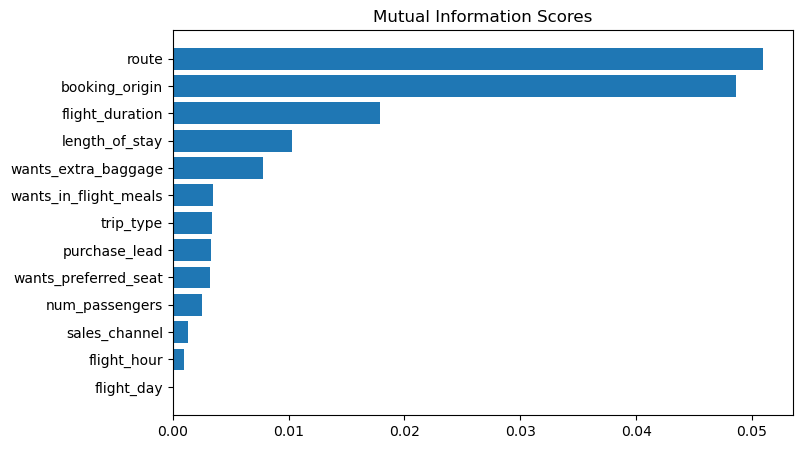

In [26]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [27]:
from sklearn.model_selection import train_test_split

def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y, test_size = 0.2, random_state =0)
    
    train_X, test_X, train_y, val_y = train_test_split(train_full_X, train_full_y, test_size = 0.25, random_state = 0)
    return(train_X, val_X, train_y, val_y)

In [28]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

In [29]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [32]:
#Random Forest Classifier Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

features = ['route', 'booking_origin', 'flight_duration','wants_extra_baggage', 'length_of_stay', 'num_passengers' ]
X = df[features]

X = pd.get_dummies(X, columns=features)
X = scale(X)
y = df.booking_complete

X_train, X_val, y_train, y_val = dataset(X,y)

forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds = forest_model.predict(X_val)

print('ACCURACY: ', accuracy_score(y_val, preds)*100)
print('AUC SCORE: ', roc_auc_score(y_val, preds))

ACCURACY:  80.08
AUC SCORE:  0.5015899814756185
